<a href="https://colab.research.google.com/github/gopalchettri/DeepLearning/blob/master/1_d_Tensorflow_Basic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple MNIST classification using Tensorflow**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Image batch shape: (32, 28, 28)
Label batch: [7 2 2 1 1 2 5 4 8 9 3 4 3 5 4 9 2 7 6 5 9 0 1 4 5 0 8 8 3 0 9 0]


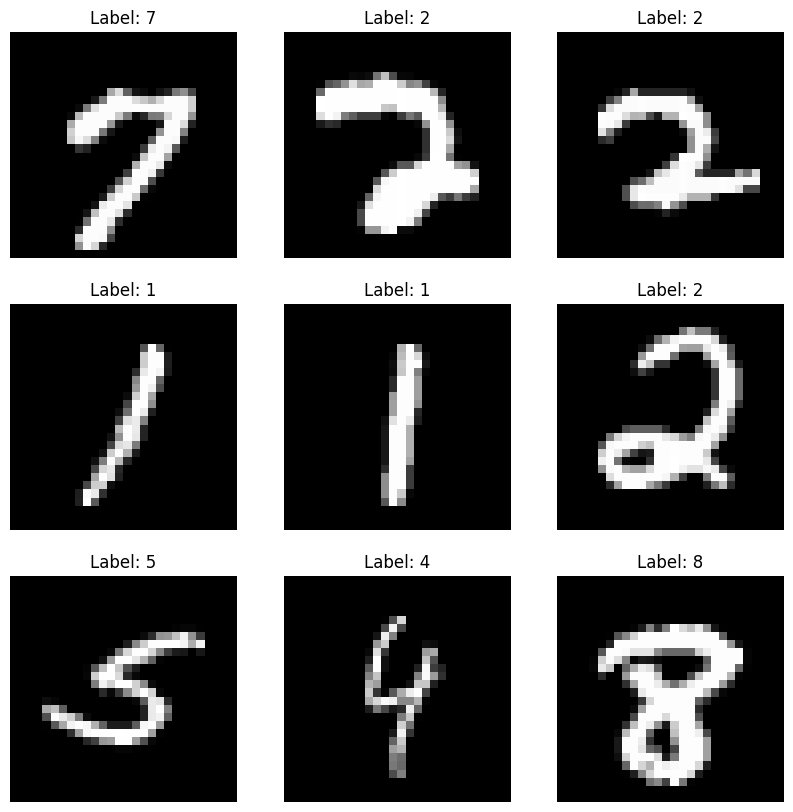

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7639 - loss: 0.7482 - val_accuracy: 0.9167 - val_loss: 0.2730
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9126 - loss: 0.2951 - val_accuracy: 0.9376 - val_loss: 0.2014
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9319 - loss: 0.2316 - val_accuracy: 0.9475 - val_loss: 0.1727
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9423 - loss: 0.1923 - val_accuracy: 0.9545 - val_loss: 0.1490
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9466 - loss: 0.1763 - val_accuracy: 0.9561 - val_loss: 0.1429
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9494 - loss: 0.1632
Final test accuracy: 0.9561


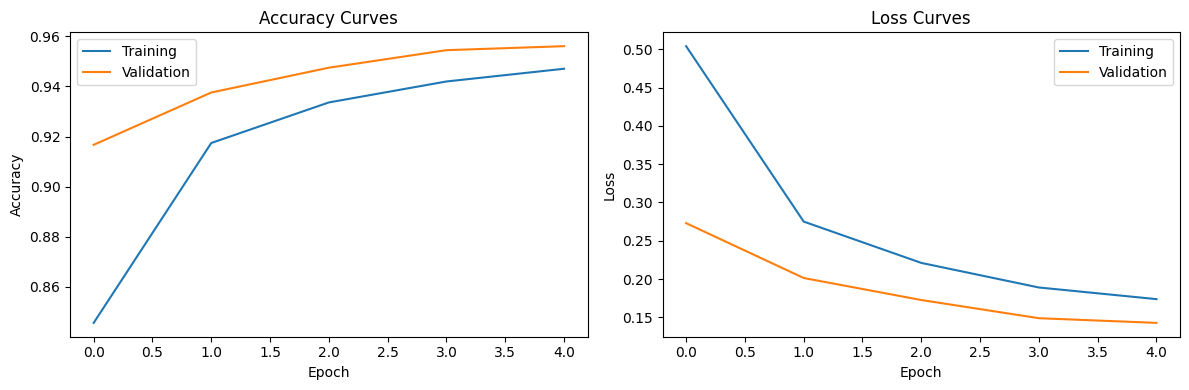

In [1]:
# Import required libraries
import tensorflow as tf  # Core TensorFlow library for deep learning
from tensorflow.keras.datasets import mnist  # MNIST dataset loader
import matplotlib.pyplot as plt  # Visualization library
import numpy as np  # Numerical computing library

# Load and prepare MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # Load train/test split
X_train = X_train.astype('float32') / 255.0  # Normalize pixel values to [0,1]
X_test = X_test.astype('float32') / 255.0  # Same normalization for test set

# Create optimized data pipelines using tf.data API
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))  # Create base dataset
train_dataset = (train_dataset
                 .shuffle(buffer_size=1024)  # Shuffle with 1024-sample buffer
                 .batch(32)  # Create batches of 32 samples
                 .prefetch(tf.data.AUTOTUNE))  # Optimize prefetching

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)  # Test pipeline

# Define data augmentation transformations
def augment(image, label):
    """Enhances training data with random transformations"""
    image = tf.image.random_flip_left_right(image)  # Horizontal flip (50% chance)
    image = tf.image.random_brightness(image, max_delta=0.1)  # Brightness adjustment (±10%)
    return image, label  # Return modified image with original label

# Apply augmentation to training pipeline
augmented_train_dataset = train_dataset.map(
    augment,  # Apply augmentation function
    num_parallel_calls=tf.data.AUTOTUNE  # Parallelize processing
)

# Inspect augmented batch
for images, labels in augmented_train_dataset.take(1):
    print(f"Image batch shape: {images.shape}")  # Expected: (32, 28, 28)
    print(f"Label batch: {labels}")  # Corresponding digit labels

# Visualize augmented samples
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 3x3 grid
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().reshape(28, 28), cmap='gray')  # Reshape flattened image
    plt.title(f"Label: {labels[i]}")  # Show true label
    plt.axis('off')
plt.show()

# Construct neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Convert 28x28 image to 784-dim vector
    tf.keras.layers.Dense(128, activation='relu'),  # Fully-connected layer with ReLU
    tf.keras.layers.Dropout(0.2),  # Regularization: drop 20% of neurons
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with class probabilities
])

# Configure model training parameters
model.compile(
    optimizer='adam',  # Adaptive Moment Estimation optimizer
    loss='sparse_categorical_crossentropy',  # Loss for integer labels
    metrics=['accuracy']  # Track classification accuracy
)

# Train model with validation
history = model.fit(
    augmented_train_dataset,  # Augmented training data
    epochs=5,  # Full passes through dataset
    validation_data=test_dataset  # Evaluate on test set after each epoch
)

# Evaluate final model performance
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Final test accuracy: {test_accuracy:.4f}")  # Format to 4 decimal places

# Visualize training metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
